<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

<h1 align="center">  Project Phase 1</h1>






STUDENT NAME: Shaghayegh Aaei,Naghmeh Adibi

STUDENT ID: 98102002, 99101076

#import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import *


#Loading Data

In [91]:
d = pd.read_csv(r'/content/Image1.csv')
img = d[['0', '1']]
#turning the data to a numpy matrix
img1 = img.to_numpy()


In [88]:
d = pd.read_csv(r'/content/Image2.csv')
img = d[['0', '1']]
#turning the data to a numpy matrix
img2 = img.to_numpy()


#ploting the data

In [ ]:
def plotting(data):
  
  plt.scatter(data[0:200, 0], data[0:200, 1])
  plt.scatter(data[200:400, 0], data[200:400, 1])
  plt.scatter(data[400:600, 0], data[400:600, 1])
  plt.legend(['Group1', 'Group2', 'Group3'])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('3 groups of data')
  plt.show()

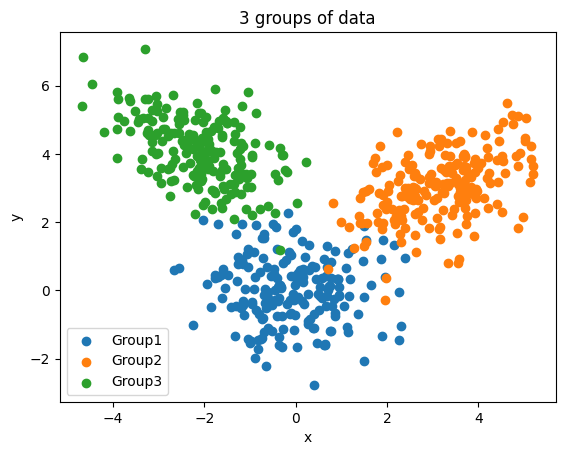

In [ ]:
plotting(img1)

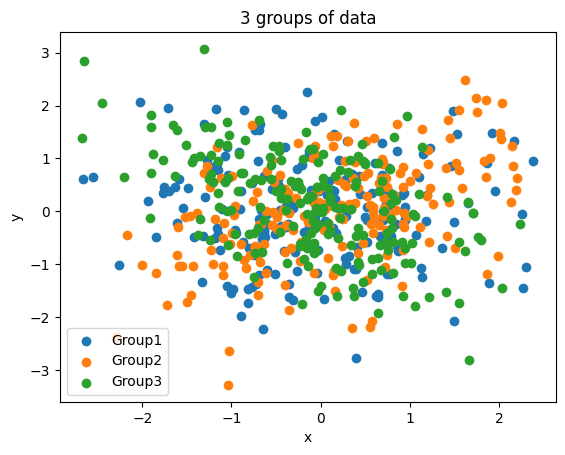

In [ ]:
plotting(img2)

#EM Algorithm

In [76]:
def initializing():
  #it's known that we have 3 cludters and each one of them has 200 data points and it's 2D
  #initializing mean with random numbers:
  mean = np.random.rand(3, 2)*20 - 10
  #initializing sigma of each cluster with I matrix
  sigma = np.zeros((3, 2, 2))
  for i in range(3):
    sigma[i] = np.eye(2)
  #initializing pi:
  pi = np.ones(3)/3
  gama = np.zeros((600, 3))
  return mean, sigma, pi, gama


In [77]:
#avoiding singularity:
def avoid_sing(cov):
  min_eig = np.min(np.real(np.linalg.eigvals(cov)))
  if min_eig < 0:
    cov -= 10*min_eig * np.eye(*cov.shape)
  return cov

In [78]:
def E_step(data, mean, cov, pi, gama):
  #this function is for calculating the array of P(Z|X)
  for i in range(3):
    gama[:, i] = (pi[i] * scipy.stats.multivariate_normal.pdf(data, mean=mean[i], cov=cov[i]))
  gama = gama / gama.sum(axis=1, keepdims=True)
  return gama

In [79]:
def M_step(data, mean, cov, pi, gama):
  w = gama.sum(axis=0)
  pi = w / 200
  mean = np.matmul(gama.T, data)
  mean /= w[:, None]
  for i in range(3):
     j = np.expand_dims(data, axis=1) - mean[i]
     s = np.matmul(j.transpose([0, 2, 1]), j)
     cov[i] = np.matmul(s.transpose(1, 2, 0), gama[:, i] )
     cov[i] /= w[i]
     cov = avoid_sing(cov)
  return mean, cov, pi


In [80]:
def log_likelihood(data, mean, cov, pi, gama):
  Log_Likelihood = []
  for x in data:
            dist = 0
            for i in range(3):
                dist += pi[i] * scipy.stats.multivariate_normal.pdf(x, mean=mean[i], cov=cov[i])
            Log_Likelihood.append(np.log(dist))
  return np.sum(Log_Likelihood)

#Running the algorithm for Datasets

In [81]:
def EM_Algorithm(data):
   #this function is for running the whole E & M step on our data
   mean, cov, pi, gama = initializing()
   LL = []
   max_itr = 150
   #for computing the convergance of likelihood we define :
   last_LL = 1
   current_LL = 0
   for i in range(max_itr):
     if(np.abs(current_LL - last_LL) <= 0.000001):
       break
     else:
       last_LL = current_LL
       gama = E_step(data, mean, cov, pi, gama)
       mean, cov, pi = M_step(data, mean, cov, pi, gama)
       current_LL = (log_likelihood(data, mean, cov, pi, gama))
       #print(current_LL)
   return mean, cov

In [94]:
mean1, cov1 = EM_Algorithm(img1)

In [ ]:
mean2, cov2 = EM_Algorithm(img2)

#Ploting the results

here we plot 2D gaussian distributions as 2D contours

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy.stats import multivariate_normal

def result_ploting(mean, cov, data):

   N    = 200
   X    = np.linspace(-7, 7, N)
   Y    = np.linspace(-7, 7, N)
   X, Y = np.meshgrid(X, Y)
   pos  = np.dstack((X, Y))
   #first cluster estimation result:
   rv   = multivariate_normal(mean[0], cov[0])
   Z    = rv.pdf(pos)
   #second cluster estimation result:
   rv   = multivariate_normal(mean[1], cov[1])
   Z1    = rv.pdf(pos)
   #third cluster estimation result:
   rv   = multivariate_normal(mean[2], cov[2])
   Z2    = rv.pdf(pos)

   plt.scatter(data[400:600, 0],data[400:600, 1], alpha=0.5)
   plt.contour(X, Y, Z)

   plt.scatter(data[200:400, 0],data[200:400, 1], alpha=0.5)
   plt.contour(X, Y, Z1)

   plt.scatter(data[:200, 0],data[:200, 1], alpha=0.5)
   plt.contour(X, Y, Z2)

   plt.show()

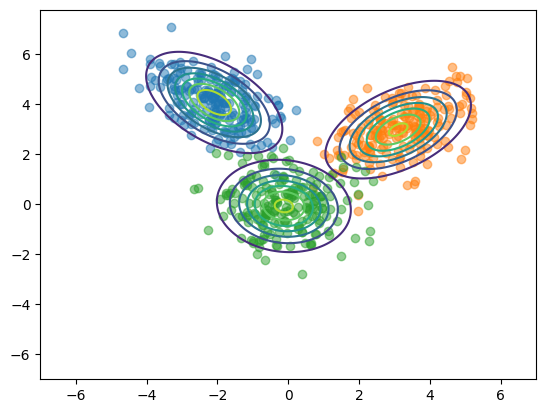

In [95]:
result_ploting(mean1, cov1, img1)
#Here is the result for th "image1" data:

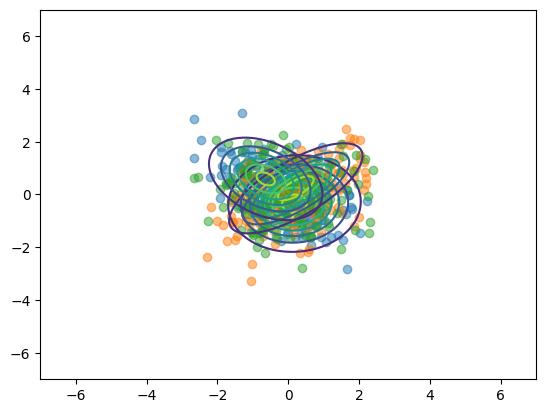

In [86]:
result_ploting(mean2, cov2, img2)

#Here is the result for th "image2" data: